In [2]:
import numpy   as np
import pandas  as pd
import xgboost as xgb
from sklearn.metrics          import accuracy_score
from sklearn.metrics          import plot_roc_curve
from sklearn.model_selection  import train_test_split
from google.colab             import drive

In [21]:
class XGBoost_classifier:
  def __init__(self):
    self.path = ''

  def read_data_from_drive(self):
    drive.mount('/content/drive')
    !mkdir temp

    !cp -av '/content/drive/MyDrive/Heart_D_ClF/heart_disease.csv' '/content/temp/heart_disease.csv'
    self.path = '/content/temp/heart_disease.csv'

  def split_traintest_set(self):
    vAR_df = pd.read_csv(self.path) 
    
    print(vAR_df.head)
    print(vAR_df.info())
    vAR_X = df.iloc[:,:-1]
    vAR_y = df.iloc[:,-1] 

    # Making train and test sets for both X and y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(vAR_X, vAR_y, test_size=0.2, 
                                                        random_state=42, shuffle=True)
    
  def train_test_model(self):
    xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=100,
                            objective='binary:logistic', booster='gbtree',
                            n_jobs=2, random_state=1)
    
    xgb_clf.fit(self.X_train, self.y_train)

    vAR_y_pred = xgb_clf.predict(self.X_test) 
    vAR_y_true = self.y_test 

    print("Accuracy: ", np.round(accuracy_score(vAR_y_true, vAR_y_pred), 3))
    print("\nROC Curve")
    print(plot_roc_curve(xgb_clf, self.X_test, self.y_test))

  def run_all(self):
    self.read_data_from_drive()
    self.split_traintest_set()
    self.train_test_model()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘temp’: File exists
'/content/drive/MyDrive/Heart_D_ClF/heart_disease.csv' -> '/content/temp/heart_disease.csv'
<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


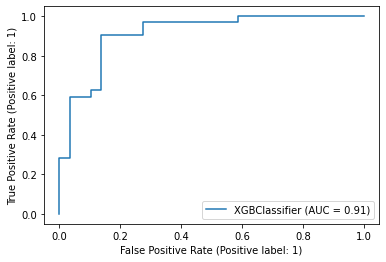

In [22]:
vAR_obj = XGBoost_classifier()
vAR_obj.run_all()